# Kaggle Shelter Animal Outcomes

https://www.kaggle.com/c/shelter-animal-outcomes

The data comes from Austin Animal Center from October 1st, 2013 to March, 2016. Outcomes represent the status of animals as they leave the Animal Center. All animals receive a unique Animal ID during intake. 

In this competition, you are going to predict the outcome of the animal as they leave the Animal Center. These outcomes include: Adoption, Died, Euthanasia, Return to owner, and Transfer. 

The train and test data are randomly split. 

# Data analysis

## Import common packages

In [82]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

## Load train and test datasets

In [83]:
train = pd.read_csv('train.csv.gz', parse_dates=['DateTime'], index_col='AnimalID')
test = pd.read_csv('test.csv.gz', parse_dates=['DateTime'], index_col='ID')

Lets take a look on train and test datasets

In [84]:
train.head()

,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
AnimalID,,,,,,,,,
A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan


In [85]:
test.head()

,Name,DateTime,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
ID,,,,,,,
1,Summer,2015-10-12 12:15:00,Dog,Intact Female,10 months,Labrador Retriever Mix,Red/White
2,Cheyenne,2014-07-26 17:59:00,Dog,Spayed Female,2 years,German Shepherd/Siberian Husky,Black/Tan
3,Gus,2016-01-13 12:20:00,Cat,Neutered Male,1 year,Domestic Shorthair Mix,Brown Tabby
4,Pongo,2013-12-28 18:12:00,Dog,Intact Male,4 months,Collie Smooth Mix,Tricolor
5,Skooter,2015-09-24 17:59:00,Dog,Neutered Male,2 years,Miniature Poodle Mix,White


## Train'n'Test proportion

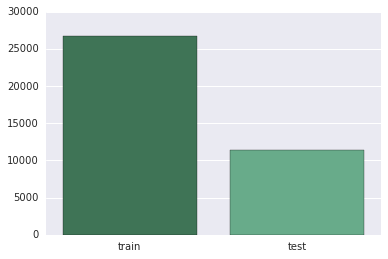

In [86]:
sns.barplot(x=['train', 'test'], y=[len(train), len(test)], palette="BuGn_d")

## Target distribution

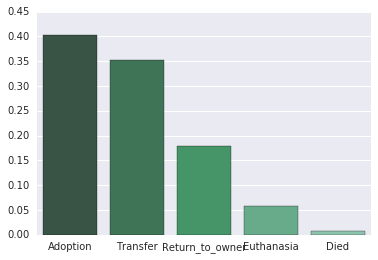

In [87]:
outcometype_dist = train['OutcomeType'].value_counts(normalize=True)
sns.barplot(x=outcometype_dist.index, y=outcometype_dist.values, palette="BuGn_d")

In [107]:
def factor_plot(data, x, hue):
    hue_dist = data[hue].value_counts()
    hue_frac_col = '{}_fraction'.format(hue)
    train[hue_frac_col] = train[hue].map(lambda v: 1/hue_dist[v])
    sns.factorplot(x=x, y=hue_frac_col, hue=hue, data=train, estimator=sum, kind='bar')
    data = data.drop(hue_frac_col, axis=1)

## OutcomeType and AnimalType correlation

### AnimalType distribution

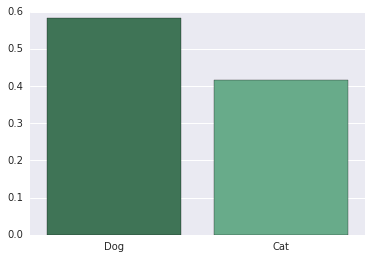

In [89]:
animaltype_dist = train['AnimalType'].value_counts(normalize=True)
sns.barplot(x=animaltype_dist.index, y=animaltype_dist.values, palette='BuGn_d')

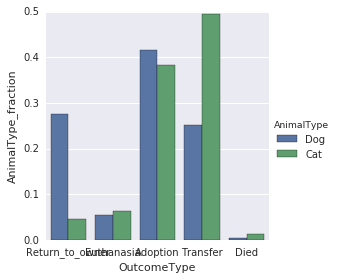

In [108]:
factor_plot(train, 'OutcomeType', 'AnimalType')

In [311]:
train['SexuponOutcome'] = train['SexuponOutcome'].fillna('Unknown')
test['SexuponOutcome'] = test['SexuponOutcome'].fillna('Unknown')
def extract_sex(sex):
    if 'Female' in sex:
        return 'Female'
    if 'Male' in sex:
        return 'Male'
    return sex

train['Sex'] = train['SexuponOutcome'].map(extract_sex)
test['Sex'] = test['SexuponOutcome'].map(extract_sex)

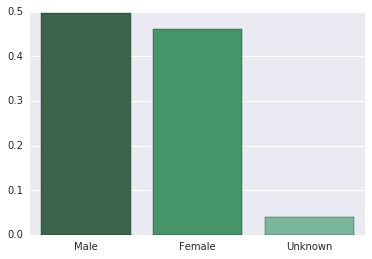

In [113]:
animaltype_dist = train['Sex'].value_counts(normalize=True)
sns.barplot(x=animaltype_dist.index, y=animaltype_dist.values, palette='BuGn_d')

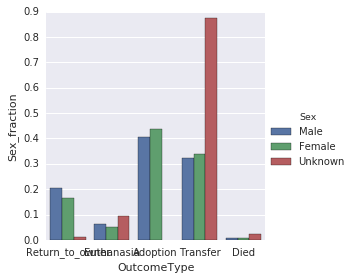

In [114]:
factor_plot(train, 'OutcomeType', 'Sex')

In [303]:
def extract_intact(sex):
    if 'Intact' in sex:
        return 'Intact'
    if 'Spayed' in sex or 'Neutered' in sex:
        return 'Spayed'
    return sex

train['Intact'] = train['SexuponOutcome'].map(extract_intact)
test['Intact'] = test['SexuponOutcome'].map(extract_intact)

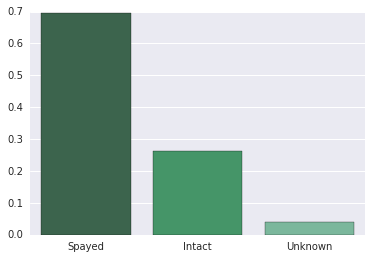

In [116]:
animaltype_dist = train['Intact'].value_counts(normalize=True)
sns.barplot(x=animaltype_dist.index, y=animaltype_dist.values, palette='BuGn_d')

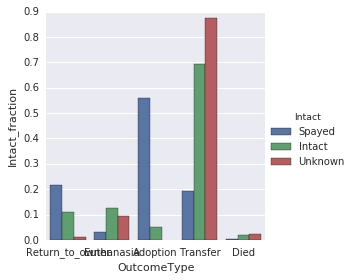

In [117]:
factor_plot(train, 'OutcomeType', 'Intact')

In [304]:
import re

def extract_age(age):
    if pd.isnull(age):
        return np.nan
    days_in = {
        'day': 1,
        'week': 7,
        'month': 30,
        'year': 365,
    }
    
    m = re.match('(?P<num>\d+)\s+(?P<period>\w+)', age)
    num = int(m.group('num'))
    period = m.group('period')
    if period.endswith('s'):
        period = period[:-1]
    return num * days_in[period]

train['Age'] = train['AgeuponOutcome'].map(extract_age)
test['Age'] = test['AgeuponOutcome'].map(extract_age)

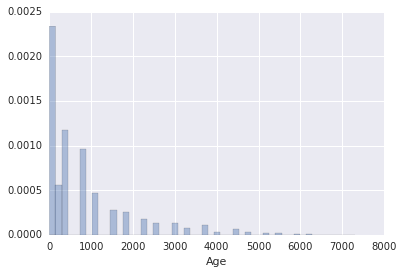

In [137]:
sns.distplot(train['Age'].dropna(), kde=False, norm_hist=True)

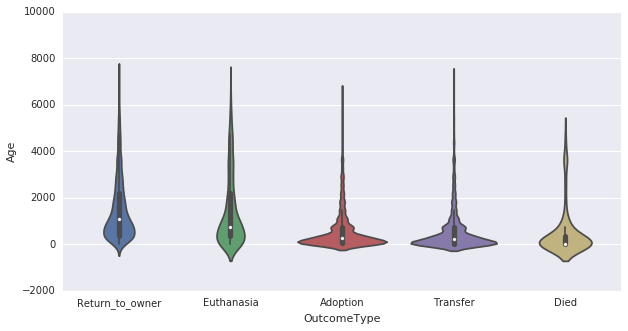

In [141]:
plt.figure(figsize=(10,5))
sns.violinplot(x='OutcomeType', y='Age', data=train)

In [582]:
for dataset in (train, test):
    dataset['Year'] = dataset['DateTime'].map(lambda dt: dt.year)
    dataset['Quarter'] = dataset['DateTime'].map(lambda dt: dt.quarter)
    dataset['Month'] = dataset['DateTime'].map(lambda dt: dt.month)
    dataset['Day'] = dataset['DateTime'].map(lambda dt: dt.day)
    dataset['DayOfWeek'] = dataset['DateTime'].map(lambda dt: dt.dayofweek)
    dataset['Hour'] = dataset['DateTime'].map(lambda dt: dt.hour)
    dataset['Minute'] = dataset['DateTime'].map(lambda dt: dt.minute)

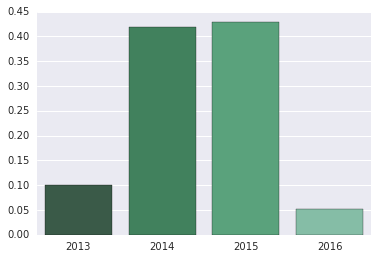

In [149]:
year_dist = train['Year'].value_counts(normalize=True)
sns.barplot(x=year_dist.index, y=year_dist.values, palette='BuGn_d')

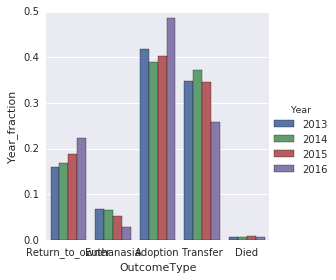

In [150]:
factor_plot(train, 'OutcomeType', 'Year')

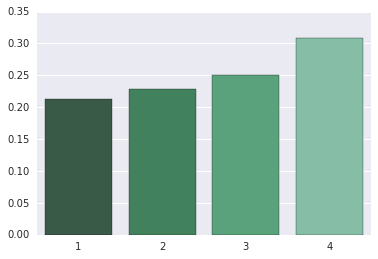

In [152]:
quarter_dist = train['Quarter'].value_counts(normalize=True)
sns.barplot(x=quarter_dist.index, y=quarter_dist.values, palette='BuGn_d')

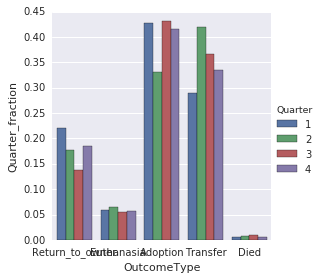

In [153]:
factor_plot(train, 'OutcomeType', 'Quarter')

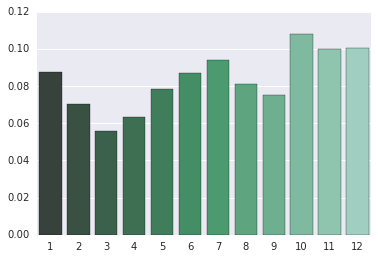

In [155]:
month_dist = train['Month'].value_counts(normalize=True)
sns.barplot(x=month_dist.index, y=month_dist.values, palette='BuGn_d')

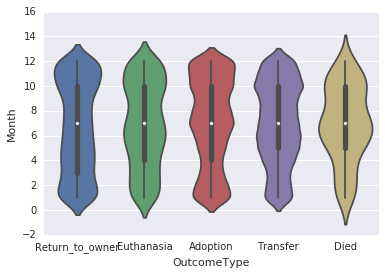

In [157]:
sns.violinplot(x='OutcomeType', y='Month', data=train)

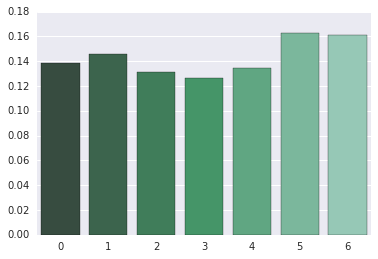

In [160]:
dayofweek_dist = train['DayOfWeek'].value_counts(normalize=True)
sns.barplot(x=dayofweek_dist.index, y=dayofweek_dist.values, palette='BuGn_d')

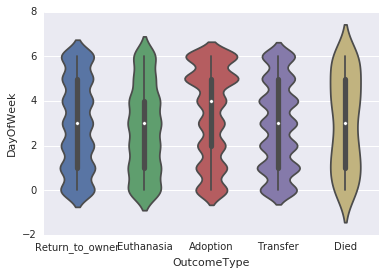

In [161]:
sns.violinplot(x='OutcomeType', y='DayOfWeek', data=train)

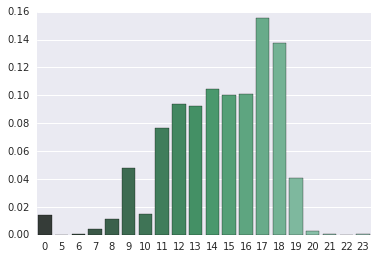

In [162]:
hour_dist = train['Hour'].value_counts(normalize=True)
sns.barplot(x=hour_dist.index, y=hour_dist.values, palette='BuGn_d')

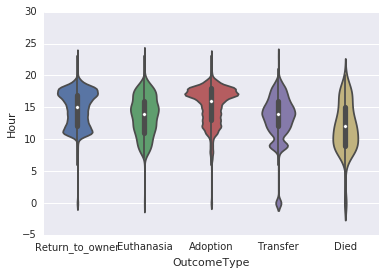

In [163]:
sns.violinplot(x='OutcomeType', y='Hour', data=train)

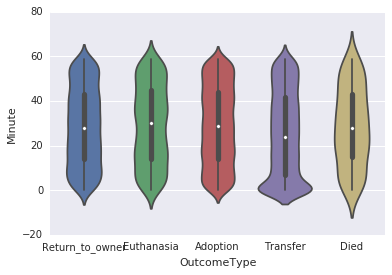

In [583]:
sns.violinplot(x='OutcomeType', y='Minute', data=train)

In [316]:
for dataset in (train, test):
    dataset['BreedMix'] = dataset['Breed'].map(lambda b: 'Mix' in b)
    dataset['Longhair'] = dataset['Breed'].map(lambda b: 'Longhair' in b)
    dataset['Shorthair'] = dataset['Breed'].map(lambda b: 'Shorthair' in b)

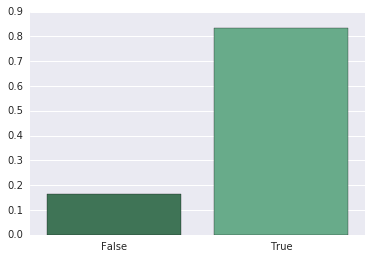

In [166]:
breed_mix_dist = train['BreedMix'].value_counts(normalize=True)
sns.barplot(x=breed_mix_dist.index, y=breed_mix_dist.values, palette='BuGn_d')

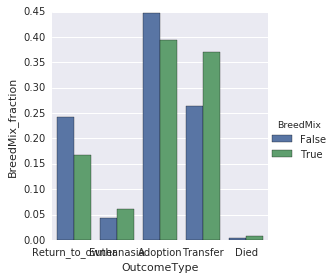

In [167]:
factor_plot(train, 'OutcomeType', 'BreedMix')

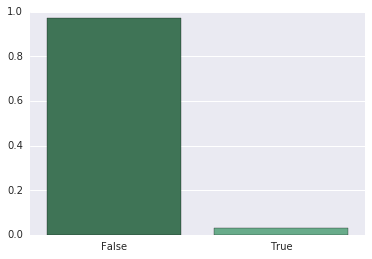

In [169]:
longhair_mix_dist = train['Longhair'].value_counts(normalize=True)
sns.barplot(x=longhair_mix_dist.index, y=longhair_mix_dist.values, palette='BuGn_d')

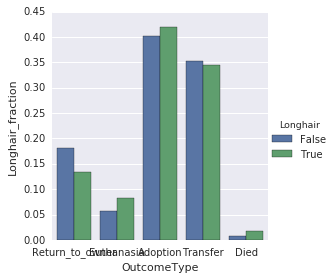

In [170]:
factor_plot(train, 'OutcomeType', 'Longhair')

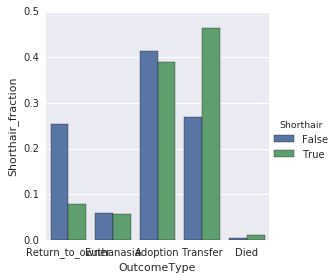

In [218]:
factor_plot(train, 'OutcomeType', 'Shorthair')

In [306]:
for dataset in (train, test):
    daysofweek = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
    dataset[daysofweek] = pd.get_dummies(dataset['DayOfWeek'].map(lambda d: daysofweek[d]), columns=daysofweek)[daysofweek]

In [307]:
for dataset in (train, test):
    dataset['HasName'] = dataset['Name'].isnull().map(lambda t: not t)

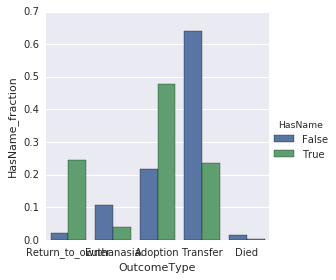

In [190]:
factor_plot(train, 'OutcomeType', 'HasName')

In [308]:
breeds_dist = train.append(test)['Breed'].value_counts(normalize=True)
for dataset in (train, test):
    dataset['BreedPopularity'] = dataset['Breed'].map(lambda b: breeds_dist[b])

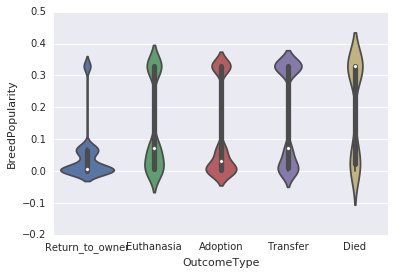

In [272]:
sns.violinplot(x='OutcomeType', y='BreedPopularity', data=train)

In [309]:
colors_dist = train.append(test)['Color'].value_counts(normalize=True)
for dataset in (train, test):
    dataset['ColorPopularity'] = dataset['Color'].map(lambda c: colors_dist[c])

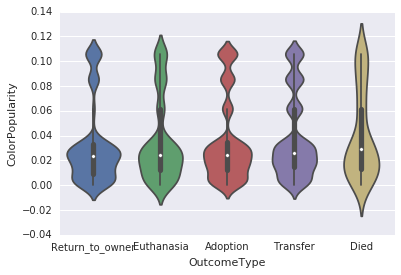

In [274]:
sns.violinplot(x='OutcomeType', y='ColorPopularity', data=train)

In [535]:
name_dist = train.append(test)['Name'].value_counts(normalize=True)
for dataset in (train, test):
    dataset['NamePopularity'] = dataset['Name'].map(lambda n: np.nan if pd.isnull(n) else name_dist[n])

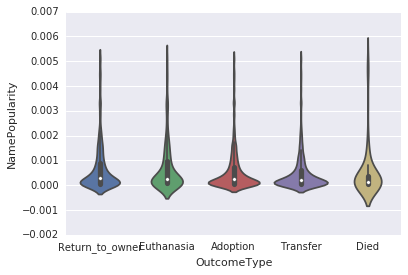

In [536]:
sns.violinplot(x='OutcomeType', y='NamePopularity', data=train)

In [540]:
for dataset in (train, test):
    dataset['NameLength'] = dataset['Name'].map(lambda n: 0 if pd.isnull(n) else len(n))

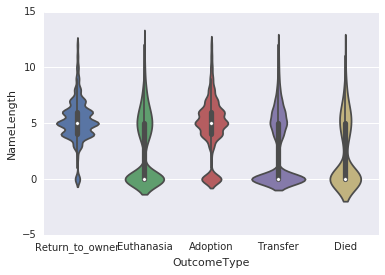

In [541]:
sns.violinplot(x='OutcomeType', y='NameLength', data=train)

In [552]:
for dataset in (train, test):
    dataset['SimpleColor'] = dataset['Color'].map(lambda c: not '/' in c).astype(int)

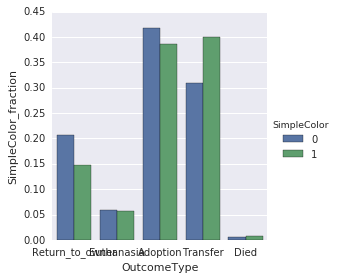

In [553]:
factor_plot(train, "OutcomeType", "SimpleColor")

In [517]:
from sklearn.preprocessing import LabelEncoder

sex_encoder = LabelEncoder().fit(train['Sex'])
intact_encoder = LabelEncoder().fit(train['Intact'])
animaltype_encoder = LabelEncoder().fit(train['AnimalType'])
outcometype_encoder = LabelEncoder().fit(train['OutcomeType'])
outcomesubtype_encoder = LabelEncoder().fit(train['OutcomeSubtype'])
breed_encoder = LabelEncoder().fit(train.append(test)['Breed'])
color_encoder = LabelEncoder().fit(train.append(test)['Color'])
age_median = train['Age'].median()

train['OutcomeTypeEncoded'] = outcometype_encoder.transform(train['OutcomeType'])
train['OutcomeSubtypeEncoded'] = outcomesubtype_encoder.transform(train['OutcomeSubtype'])

for dataset in (train, test):
    dataset['SexEncoded'] = sex_encoder.transform(dataset['Sex'])
    dataset['IntactEncoded'] = intact_encoder.transform(dataset['Intact'])
    dataset['AnimalTypeEncoded'] = animaltype_encoder.transform(dataset['AnimalType'])
    dataset['BreedEncoded'] = breed_encoder.transform(dataset['Breed'])
    dataset['ColorEncoded'] = color_encoder.transform(dataset['Color'])
    dataset['AgeFilled'] = dataset['Age'].fillna(age_median)

outcomesubtype_columns = ['OutcomeSubtype_{}'.format(subtype) for subtype in outcomesubtype_encoder.classes_]
for column_name, subtype in zip(outcomesubtype_columns, outcomesubtype_encoder.classes_):
    train[column_name] = (train['OutcomeSubtype'] == subtype).astype(int)

In [584]:
features = [
    'AgeFilled',
    'AnimalTypeEncoded',
    'SexEncoded',
    'IntactEncoded',
    'HasName',
    'Year',
    'Month',
    'Quarter',
    'Hour',
    'Minute',
    'BreedMix',
#     'BreedPopularity',
#     'Longhair',
#     'Shorthair',
#     'ColorPopularity',
    *daysofweek,
#     *outcomesubtype_columns,
#     'OutcomeSubtypeEncoded',
    'BreedEncoded',
#     'ColorEncoded',
#     'NamePopularity',
#     'NameLength',
#     'SimpleColor',
]

target = 'OutcomeTypeEncoded'

X = train[features]
y = train[target]

In [559]:
params = {
    'n_estimators': 100,
    'max_depth': 9,
    'subsample': 0.8,
    'colsample_bytree': 0.85,
    'seed': 42,
}

In [511]:
from sklearn.grid_search import RandomizedSearchCV, GridSearchCV
from xgboost import XGBClassifier

param_grid = {
    'n_estimators': np.arange(50, 120, 10),
    'max_depth': np.arange(4, 12),
    'subsample': np.linspace(0.7, 1.0, 10),
    'colsample_bytree': np.linspace(0.7, 1.0, 10),
}

grid_search = RandomizedSearchCV(XGBClassifier(**params), param_grid, cv=3, scoring='log_loss', verbose=True, n_iter=100)

%time grid_search.fit(X, y).best_score_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:  1.5min
[Parallel(n_jobs=1)]: Done 199 tasks       | elapsed:  5.6min
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:  8.6min finished


CPU times: user 43min 43s, sys: 3min 40s, total: 47min 24s
Wall time: 8min 38s


-0.7466863879594825

In [572]:
grid_search.best_params_

{'colsample_bytree': 0.79999999999999993,
 'max_depth': 8,
 'n_estimators': 110,
 'subsample': 0.8666666666666667}

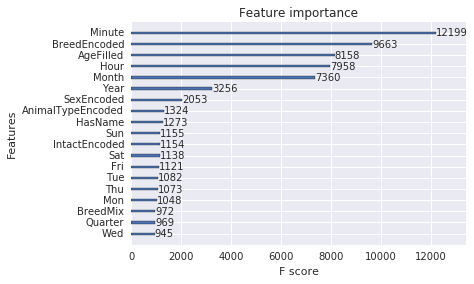

In [585]:
from xgboost import plot_importance

params1 = params.copy()
params1.update(grid_search.best_params_)
xgb = XGBClassifier(**params1).fit(X, y)
plot_importance(xgb)

In [604]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [587]:
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import log_loss
from sklearn.preprocessing import label_binarize

params1 = params.copy()
params1.update(grid_search.best_params_)
scores1 = cross_val_score(XGBClassifier(**params1), X, y, cv=5, scoring='log_loss')
print("mean_score: {:0.6f}, score_std: {:0.6f}".format(scores1.mean(), scores1.std()))

mean_score: -0.733239, score_std: 0.006916


In [588]:
params2 = params1.copy()
params2['colsample_bytree'] = 0.65
scores2 = cross_val_score(XGBClassifier(**params2), X, y, cv=5, scoring='log_loss')
print("mean_score: {:0.6f}, score_std: {:0.6f}".format(scores2.mean(), scores2.std()))

mean_score: -0.730661, score_std: 0.006401


In [589]:
params3 = params.copy()
params3['colsample_bytree'] = 0.75
scores3 = cross_val_score(XGBClassifier(**params3), X, y, cv=5, scoring='log_loss')
print("mean_score: {:0.6f}, score_std: {:0.6f}".format(scores3.mean(), scores3.std()))

mean_score: -0.731780, score_std: 0.005564


In [647]:
y_pred1 = XGBClassifier(**params1).fit(X_train, y_train).predict_proba(X_test)
y_pred2 = XGBClassifier(**params2).fit(X_train, y_train).predict_proba(X_test)
y_pred3 = XGBClassifier(**params3).fit(X_train, y_train).predict_proba(X_test)

In [648]:
log_loss(y_test, y_pred1)

0.73180711390645714

In [649]:
log_loss(y_test, y_pred2)

0.72945161018616578

In [650]:
log_loss(y_test, y_pred3)

0.73073642536500605

In [651]:
log_loss(y_test, (y_pred1 + y_pred2 + y_pred3)/3)

0.72741441605993284

In [652]:
log_loss(y_test, np.power(y_pred1 * y_pred2 * y_pred3, 1/3))

0.72758277170479424

In [653]:
log_loss(y_test, 3/(1/y_pred1 + 1/y_pred2 + 1/y_pred3))

0.72779619416924557

In [654]:
from sklearn.calibration import CalibratedClassifierCV

xgb1_calibrated = CalibratedClassifierCV(XGBClassifier(**params1), cv=10, method='isotonic').fit(X_train, y_train)
y_pred_calib1 = xgb1_calibrated.predict_proba(X_test)
log_loss(y_test, y_pred_calib1)

0.72813229276146441

In [655]:
xgb2_calibrated = CalibratedClassifierCV(XGBClassifier(**params2), cv=10, method='isotonic').fit(X_train, y_train)
y_pred_calib2 = xgb2_calibrated.predict_proba(X_test)
log_loss(y_test, y_pred_calib2)

0.73558475095768894

In [656]:
xgb3_calibrated = CalibratedClassifierCV(XGBClassifier(**params3), cv=10, method='isotonic').fit(X_train, y_train)
y_pred_calib3 = xgb3_calibrated.predict_proba(X_test)
log_loss(y_test, y_pred_calib3)

0.73275698976444292

In [657]:
log_loss(y_test, (y_pred1 + y_pred2 + y_pred3 + y_pred_calib1 + y_pred_calib2 + y_pred_calib3)/6)

0.72475547909189875

In [658]:
log_loss(y_test, (y_pred_calib1 + y_pred_calib2 + y_pred_calib3)/3)

0.7244142160340894

In [659]:
log_loss(y_test, np.power(y_pred1 * y_pred2 * y_pred3, 1/3))

0.72758277170479424

In [698]:
from sklearn.ensemble import RandomForestClassifier

rf_estimator = RandomForestClassifier(n_estimators=90, max_depth=14).fit(X_train, y_train)
rf_pred = rf_estimator.predict_proba(X_test)
log_loss(y_test, rf_pred)

0.74982734867920586

In [707]:
from scipy.optimize import minimize

def target_fn(x):
    return log_loss(y_test, x[0]*rf_pred + x[1]*y_pred2 + x[2]*y_pred3 + x[3]*y_pred_calib1 + x[4]*y_pred_calib2 + x[5]*y_pred_calib3)

def norm_consraint(x):
    return np.sum(x) - 1

xopt = minimize(target_fn, [1/6]*6, bounds=[[0, 1] for i in range(6)], constraints=({'type': 'eq', 'fun': norm_consraint}), tol=1e-14)
xopt

     fun: 0.72153582590073995
     jac: array([ -9.05916095e-05,   6.17079437e-04,   5.51802665e-03,
         2.24620849e-03,   7.24270940e-05,  -9.06065106e-05,
         0.00000000e+00])
 message: 'Optimization terminated successfully.'
    nfev: 305
     nit: 35
    njev: 35
  status: 0
 success: True
       x: array([  1.31537379e-01,   0.00000000e+00,   9.97620177e-02,
         3.75720735e-18,   3.21269827e-17,   7.68700603e-01])

In [682]:
alpha = xopt.x

In [669]:
xgb1 = XGBClassifier(**params1).fit(X, y)
xgb2 = XGBClassifier(**params2).fit(X, y)
xgb3 = XGBClassifier(**params3).fit(X, y)

xgb1_calibrated.fit(X, y)
xgb2_calibrated.fit(X, y)
xgb3_calibrated.fit(X, y)

KeyboardInterrupt: 

In [641]:
y_pred1 = xgb1.predict_proba(test[features])
y_pred2 = xgb2.predict_proba(test[features])
y_pred3 = xgb3.predict_proba(test[features])

y_pred_calibrated1 = xgb1_calibrated.predict_proba(test[features])
y_pred_calibrated2 = xgb2_calibrated.predict_proba(test[features])
y_pred_calibrated3 = xgb3_calibrated.predict_proba(test[features])
y_pred = (alpha[0]*y_pred1 + alpha[1]*y_pred2 + alpha[2]*y_pred3 + alpha[3]*y_pred_calibrated1 + alpha[4]*y_pred_calibrated2 + alpha[5]*y_pred_calibrated3)
# y_pred = y_pred2

In [642]:
submission = pd.DataFrame(index=test.index)
for i, outcome_type in enumerate(outcometype_encoder.classes_):
    submission[outcome_type] = y_pred[:, i]

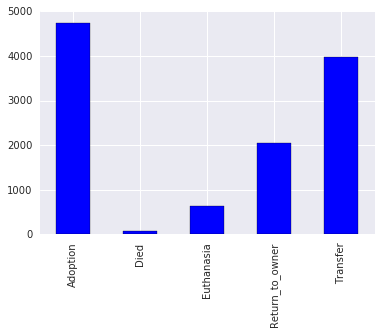

In [643]:
submission.sum().plot(kind='bar')

In [644]:
submission.to_csv('pred.csv')